In [1]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = 256
CHANNELS = 3

# Image Data Generation of  Traning, Validation, and Testing sets

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  
    width_shift_range=0.3,  
    height_shift_range=0.3,  
    shear_range=0.3,  
    zoom_range=0.3,  
    brightness_range=[0.7, 1.3],  
    horizontal_flip=True,
    vertical_flip=True  
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="binary"  
)


Found 1889 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'non_potato_leaf': 0, 'potato_leaf': 1}

In [10]:
class_names = list(train_generator.class_indices.keys())
class_names

['non_potato_leaf', 'potato_leaf']

In [11]:
# array representation of one image
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.1764706  0.14117648 0.10588236]
  [0.23137257 0.19215688 0.14509805]
  [0.40000004 0.34117648 0.27450982]
  ...
  [0.19607845 0.19607845 0.18823531]
  [0.19607845 0.19607845 0.18823531]
  [0.19607845 0.19607845 0.18823531]]

 [[0.17254902 0.13725491 0.10196079]
  [0.22352943 0.18431373 0.14117648]
  [0.3803922  0.3254902  0.2627451 ]
  ...
  [0.19607845 0.19607845 0.18823531]
  [0.19607845 0.19607845 0.18823531]
  [0.19607845 0.19607845 0.18823531]]

 [[0.16862746 0.13725491 0.10196079]
  [0.21960786 0.18039216 0.14117648]
  [0.3647059  0.30980393 0.24705884]
  ...
  [0.19607845 0.19607845 0.18823531]
  [0.19607845 0.19607845 0.18823531]
  [0.19607845 0.19607845 0.18823531]]

 ...

 [[0.23137257 0.17254902 0.15294118]
  [0.25490198 0.19607845 0.1764706 ]
  [0.2509804  0.19215688 0.17254902]
  ...
  [0.1137255  0.09803922 0.09411766]
  [0.11764707 0.10196079 0.09803922]
  [0.12156864 0.10588236 0.10196079]]

 [[0.21960786 0.16078432 0.14509805]
  [0.21960786 0.16470589 0.14901961]


In [12]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="binary"  
)


Found 403 images belonging to 2 classes.


In [13]:
validation_generator.class_indices

{'non_potato_leaf': 0, 'potato_leaf': 1}

In [14]:
class_names = list(validation_generator.class_indices.keys())
class_names

['non_potato_leaf', 'potato_leaf']

In [191]:
# array representation of one image
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.4156863  0.4039216  0.42352945]
  [0.40000004 0.38431376 0.4039216 ]
  [0.427451   0.4156863  0.43529415]
  ...
  [0.16078432 0.15294118 0.10980393]
  [0.25490198 0.24313727 0.21176472]
  [0.40000004 0.38823533 0.37254903]]

 [[0.42352945 0.40784317 0.427451  ]
  [0.40784317 0.3921569  0.41176474]
  [0.4039216  0.3921569  0.41176474]
  ...
  [0.1764706  0.18431373 0.11764707]
  [0.12156864 0.12156864 0.07058824]
  [0.14117648 0.14117648 0.09411766]]

 [[0.43529415 0.42352945 0.43921572]
  [0.45098042 0.43529415 0.454902  ]
  [0.41960788 0.4039216  0.42352945]
  ...
  [0.08627451 0.10196079 0.01568628]
  [0.07058824 0.08627451 0.01176471]
  [0.12156864 0.13333334 0.0627451 ]]

 ...

 [[0.45098042 0.43529415 0.44705886]
  [0.44705886 0.427451   0.43921572]
  [0.43921572 0.42352945 0.43529415]
  ...
  [0.5254902  0.50980395 0.5294118 ]
  [0.52156866 0.5058824  0.5254902 ]
  [0.5372549  0.52156866 0.5372549 ]]

 [[0.45098042 0.43529415 0.44705886]
  [0.44705886 0.427451   0.43921572]


In [15]:
test_generator = ImageDataGenerator(
    rescale=1./255,
)

test_generator = validation_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="binary"  
)

Found 407 images belonging to 2 classes.


In [193]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.18039216 0.36862746 0.32156864]
  [0.18431373 0.36862746 0.3372549 ]
  [0.19215688 0.38431376 0.36862746]
  ...
  [0.227451   0.24313727 0.28627452]
  [0.18431373 0.21176472 0.2509804 ]
  [0.18431373 0.21176472 0.2509804 ]]

 [[0.19215688 0.3803922  0.33333334]
  [0.1764706  0.36078432 0.32941177]
  [0.1764706  0.36862746 0.3529412 ]
  ...
  [0.2392157  0.25882354 0.28235295]
  [0.16862746 0.19607845 0.21960786]
  [0.14509805 0.17254902 0.19607845]]

 [[0.20000002 0.38823533 0.34117648]
  [0.16862746 0.3529412  0.32156864]
  [0.16470589 0.35686275 0.34117648]
  ...
  [0.22352943 0.25490198 0.2627451 ]
  [0.20784315 0.2392157  0.24705884]
  [0.2784314  0.30980393 0.31764707]]

 ...

 [[0.41960788 0.44705886 0.41960788]
  [0.44705886 0.4666667  0.4431373 ]
  [0.4156863  0.43529415 0.41176474]
  ...
  [0.27450982 0.5058824  0.52156866]
  [0.29803923 0.5372549  0.54901963]
  [0.30980393 0.56078434 0.5686275 ]]

 [[0.3921569  0.41960788 0.3921569 ]
  [0.41960788 0.43921572 0.4156863 ]


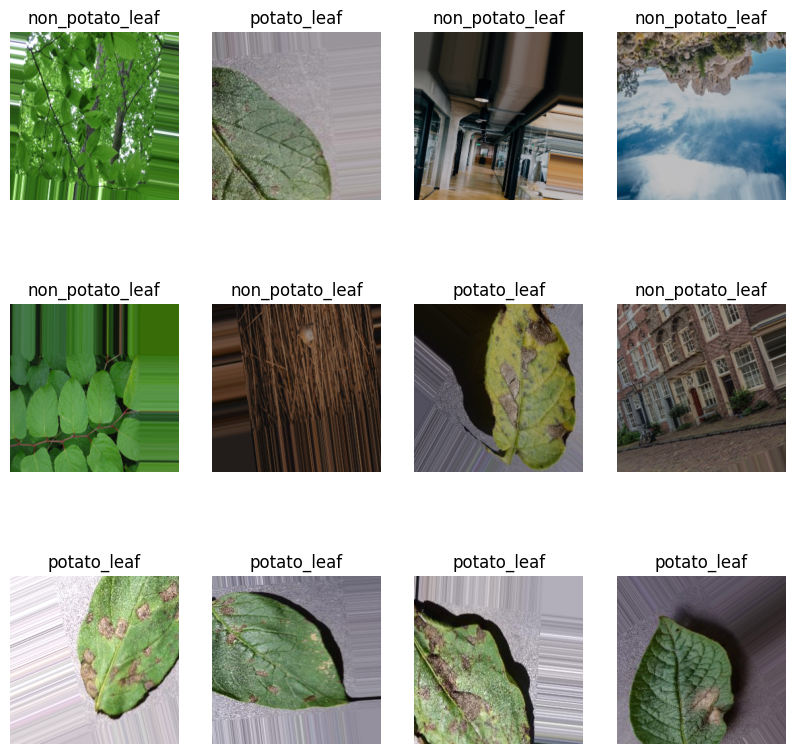

In [16]:
# Get a batch of images and labels from the train generator
image_batch, labels_batch = next(train_generator)

# Display the first 12 images from the batch
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i])
    plt.title(class_names[int(labels_batch[i])])
    plt.axis("off")
plt.show()


In [17]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Input shape for the images
n_classes = 2  #  2 classes for binary classification (potato leaf or not)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid'),
])


c:\Users\Hp\Desktop\traning Tsaks\aak\cnnVenv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [195]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,658 (7.04 MB)

 Trainable params: 1,846,658 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model

In [43]:
history = model.fit(
    train_generator,
    steps_per_epoch=59,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=12,
    verbose=1,
    epochs=20,
)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 314s 5s/step - accuracy: 0.9529 - loss: 0.1302 - val_accuracy: 0.9740 - val_loss: 0.0698
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9688 - loss: 0.1309 - val_accuracy: 0.8947 - val_loss: 0.2098
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.9673 - loss: 0.0928 - val_accuracy: 0.9922 - val_loss: 0.0260
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 294s 5s/step - accuracy: 0.9767 - loss: 0.0708 - val_accuracy: 0.9974 - val_loss: 0.0188
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9688 - loss: 0.0571 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.9817 - loss: 0.0651 - val_accuracy: 0.9583 - val_loss: 0.0918
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9688 - loss: 0.0801 - val_accuracy: 1.0000 - val

In [46]:
scores = model.evaluate(test_generator)
scores

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 753ms/step - accuracy: 0.9892 - loss: 0.0280


[0.027064649388194084, 0.9926289916038513]

In [47]:
history

In [48]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 59}

In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [50]:
type(history.history['loss'])

list

In [51]:
len(history.history['loss'])

20

In [52]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.11163418740034103,
 0.13094080984592438,
 0.09755942225456238,
 0.025478247553110123,
 0.08339647948741913]

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [56]:
val_acc

[0.9739583134651184,
 0.8947368264198303,
 0.9921875,
 1.0,
 0.9973958134651184,
 1.0,
 0.9583333134651184,
 1.0,
 0.9921875,
 1.0,
 0.9088541865348816,
 0.9473684430122375,
 0.9661458134651184,
 1.0,
 0.9401041865348816,
 0.9473684430122375,
 0.984375,
 1.0,
 0.9895833134651184,
 1.0]

In [57]:
acc

[0.9601507782936096,
 0.96875,
 0.9698092937469482,
 1.0,
 0.9730748534202576,
 0.96875,
 0.9741518497467041,
 0.96875,
 0.9768443703651428,
 0.96875,
 0.9773828983306885,
 0.875,
 0.9418416619300842,
 0.96875,
 0.9159935116767883,
 0.84375,
 0.9305331110954285,
 1.0,
 0.9752288460731506,
 1.0]

# Visualize training and validation accuracy

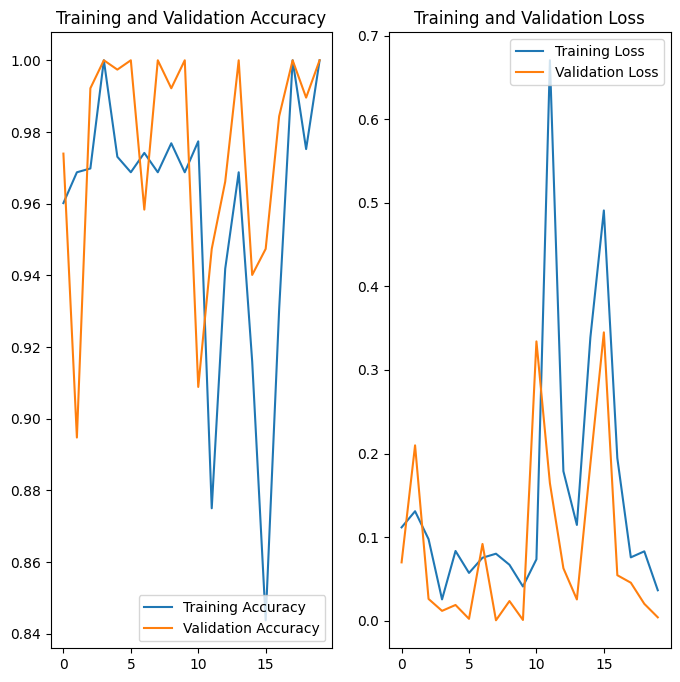

In [58]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Make predictions on a single image

First image to predict
Actual label: potato_leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted label: potato_leaf


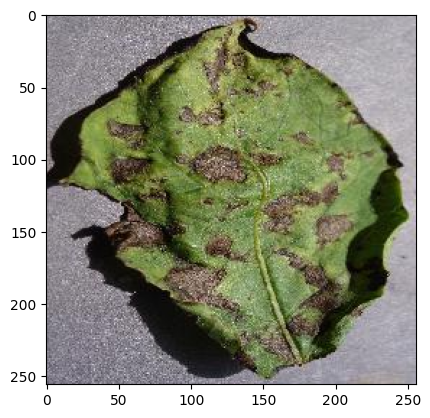

In [83]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break

# Make predictions on multiple images

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


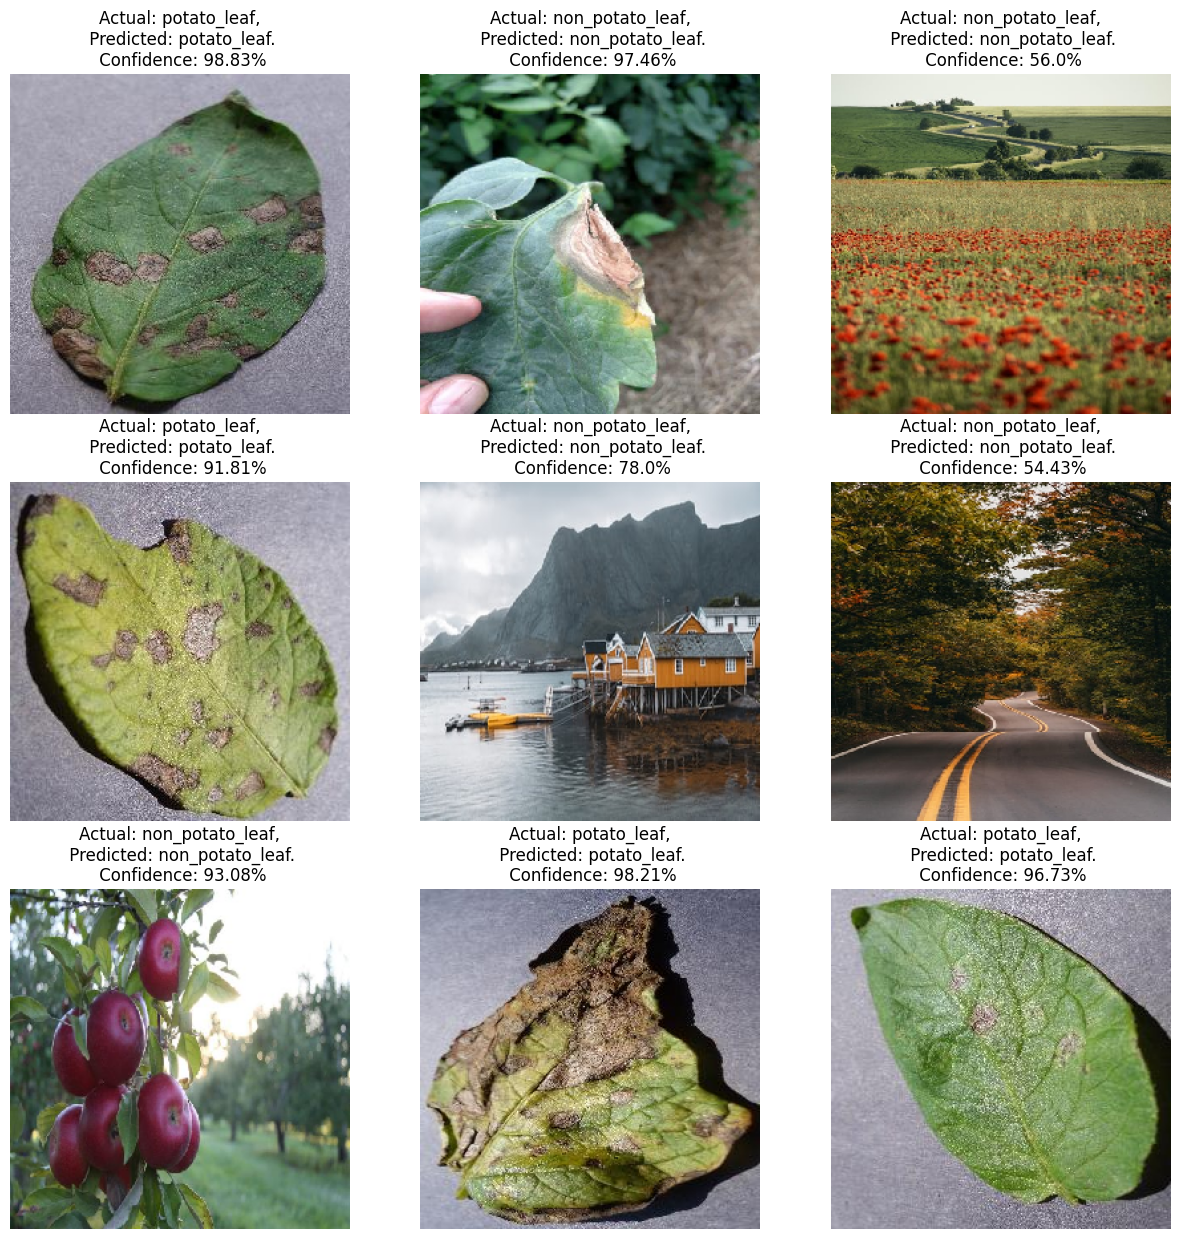

In [82]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# Save the model to a file for future use

In [235]:
model.save("..saved_models/binary_model_10.keras")